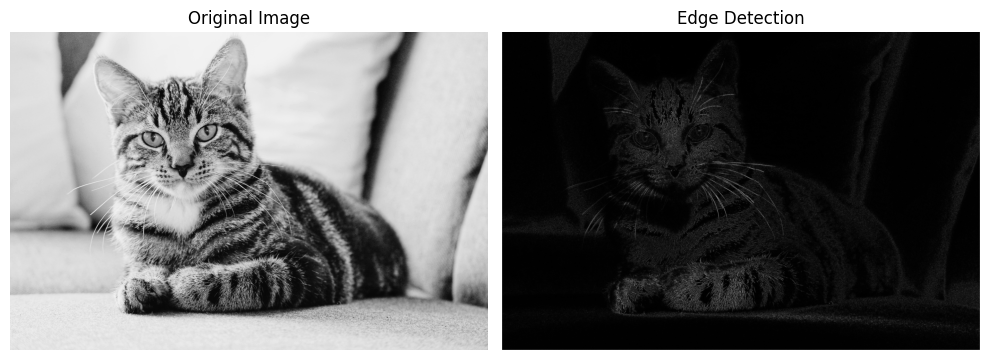

In [ ]:
import numpy as np, cv2, matplotlib.pyplot as plt

# 입력 이미지 로딩
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# 3x3 엣지 검출 커널 정의 (Laplacian 커널 예제)
edge_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# 이미지 크기 및 커널 크기
image_height, image_width = image.shape
kernel_height, kernel_width = edge_kernel.shape

# 결과 이미지를 저장할 배열 생성 (원본 이미지와 같은 크기)
output = np.zeros((image_height, image_width), dtype=np.float32)

# np.pad를 사용하여 이미지를 1픽셀 패딩을 추가합니다. 
# 가장자리에 있는 픽셀에 대해서도 커널을 정상적으로 적용할 수 있습니다.
# 이 패딩된 영역은 일반적으로 0으로 채워집니다.
padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

# 컨볼루션 수행
for i in range(image_height):
    for j in range(image_width):
        # 3x3 영역 추출
        region = padded_image[i:i + kernel_height, j:j + kernel_width]
        # 커널과 영역의 곱셈 및 합산
        output[i, j] = np.sum(region * edge_kernel)
    pass
pass

# 출력 결과의 값을 0과 255 사이로 클리핑
output = np.clip(output, 0, 255)

# 결과 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edge Detection')
plt.imshow(output, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()